<a href="https://colab.research.google.com/github/ReyhaneTaj/Data-Science-Practices/blob/main/Pipeline_Housing_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is a Pipeline?

A pipeline is a sequence of data processing steps arranged in a specific order, where the output of one step is the input to the next. In machine learning, pipelines are used to automate and streamline workflows, from data preprocessing to model training and evaluation.

### Why Pipelines Are Important:
- **Consistency**: Ensures the same processing steps are applied to both training and test data, reducing errors.
- **Reproducibility**: Simplifies reproducing results by encapsulating the entire workflow in a single framework.
- **Efficiency**: Automates the workflow, saving time and reducing the risk of manual errors.
- **Modularity**: Allows for easy adjustments and maintenance by breaking down the workflow into discrete, manageable steps.
- **Prevents Data Leakage**: Properly handles data transformation and model fitting to avoid data leakage.
## Example: Pipeline for Housing Price Prediction

Below is a Python example of how to use a pipeline for predicting housing prices. The pipeline handles data preprocessing steps like scaling and encoding, and then trains a model.

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing(as_frame=True)
X, y = housing.data, housing.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create a preprocessing pipeline for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the final pipeline with the preprocessor and a model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = pipeline.predict(X_test)

# Output the predictions
print(predictions[:5])  # Print the first 5 predictions


[0.49579   0.71843   4.8337562 2.57886   2.33331  ]


In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.3273669310077521
Mean Squared Error (MSE): 0.2544818063594658
R-squared (R²): 0.8057997078888428


### Analysis:

- **Mean Absolute Error (MAE)**: Average absolute difference between predicted and actual values. Lower is better.
- **Mean Squared Error (MSE)**: Similar to MAE but penalizes larger errors more. Again, lower is better.
- **R-squared (R²)**: Measures how well the model explains the variance in the data. Closer to 1 means better performance.

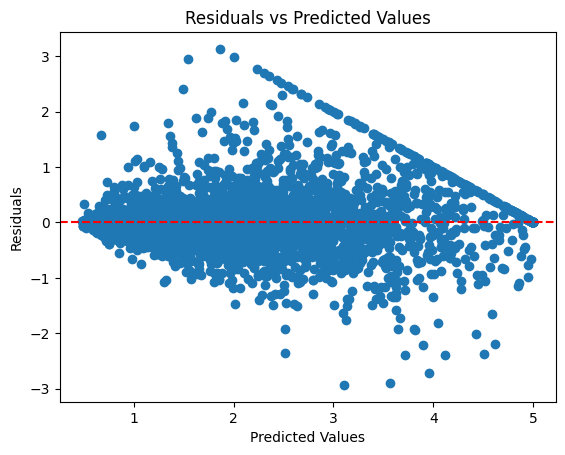

In [3]:
residuals = y_test - predictions

# Plot residuals
import matplotlib.pyplot as plt
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


### Analysis of the Residuals Plot:

The residuals plot shows the difference between the actual and predicted housing prices. The interpretion of the plot:

- **Random Scatter**: Ideally, residuals should be randomly scattered around the horizontal axis (y = 0). This indicates that the model captures the underlying pattern in the data well.

  - **Observation**: In this plot, the residuals appear mostly scattered, but there's a noticeable funnel-shaped pattern, especially at higher predicted values.

- **Funnel Shape**: A funnel shape, where the spread of residuals increases as the predicted value increases, might indicate heteroscedasticity (non-constant variance in errors).

  - **Possible Issue**: This suggests that the model's error increases with the predicted value, which could mean that the model is less reliable for higher-priced houses.

- **No Clear Pattern**: There should be no clear pattern in the residuals. If you observe patterns (e.g., a curved line or systematic spread), it could mean that the model is missing some important relationships in the data.

  - **Observation**: Although there’s some clustering, there doesn’t appear to be a strong non-linear pattern, which is generally good. However, the tapering off at higher values might indicate that the model struggles with extreme values.

### Next Steps:
- **Address Heteroscedasticity**: If heteroscedasticity is confirmed, consider using techniques such as transforming the target variable (e.g., log transformation) or using models that can handle varying variance.

- **Model Refinement**: Consider further feature engineering, trying more complex models, or investigating potential data issues that could contribute to this pattern.

This plot is a crucial diagnostic tool for understanding how well our model is performing and where it might be improved.
